In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [37]:
ds=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Flask\3D printer Material Prediction.csv")

In [38]:
ds

layer_height  wall_thickness  infill_density infill_pattern  \
0           0.02             8.0              90           grid   
1           0.02             7.0              90      honeycomb   
2           0.02             1.0              80           grid   
3           0.02             4.0              70      honeycomb   
4           0.02             6.0              90           grid   
..           ...             ...             ...            ...   
61          0.06             9.0              10      honeycomb   
62          0.04             2.0              80           grid   
63          0.02             4.5              70      honeycomb   
64          0.05             6.0              10      honeycomb   
65          0.15             1.0              50           grid   

    nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                  220               60           40      abs          0   
1                  225               65           40      abs         25   
2                  230               70           40      abs         50   
3                  240               75           40      abs         75   
4                  250               80           40      abs        100   
..                 ...              ...          ...      ...        ...   
61                 200               75           80      abs         75   
62                 230               70           40      abs         50   
63                 240               85           40      abs         75   
64                 245               75           85      abs         75   
65                 220               60          120      abs          0   

    roughness  tension_strenght  elongation  
0          25                18         1.2  
1          32                16         1.4  
2          40                 8         0.8  
3          68                10         0.5  
4          92                 5         0.7  
..        ...               ...         ...  
61        200                 9         0.9  
62         40                12         0.8  
63         68                10         0.8  
64        205                 5         0.5  
65        120                16         1.5  

[66 rows x 12 columns]

In [39]:
ds.head()

layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02             8.0              90           grid   
1          0.02             7.0              90      honeycomb   
2          0.02             1.0              80           grid   
3          0.02             4.0              70      honeycomb   
4          0.02             6.0              90           grid   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   
2                 230               70           40      abs         50   
3                 240               75           40      abs         75   
4                 250               80           40      abs        100   

   roughness  tension_strenght  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40                 8         0.8  
3         68                10         0.5  
4         92                 5         0.7

In [40]:
ds.tail()

layer_height  wall_thickness  infill_density infill_pattern  \
61          0.06             9.0              10      honeycomb   
62          0.04             2.0              80           grid   
63          0.02             4.5              70      honeycomb   
64          0.05             6.0              10      honeycomb   
65          0.15             1.0              50           grid   

    nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
61                 200               75           80      abs         75   
62                 230               70           40      abs         50   
63                 240               85           40      abs         75   
64                 245               75           85      abs         75   
65                 220               60          120      abs          0   

    roughness  tension_strenght  elongation  
61        200                 9         0.9  
62         40                12         0.8  
63         68                10         0.8  
64        205                 5         0.5  
65        120                16         1.5

In [41]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   bed_temperature     66 non-null     int64  
 6   print_speed         66 non-null     int64  
 7   material            66 non-null     object 
 8   fan_speed           66 non-null     int64  
 9   roughness           66 non-null     int64  
 10  tension_strenght    66 non-null     int64  
 11  elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB


In [42]:
ds.describe()

layer_height  wall_thickness  infill_density  nozzle_temperature  \
count     66.000000       66.000000       66.000000           66.000000   
mean       0.098182        5.583333       54.727273          222.272727   
std        0.062608        2.952943       27.545512           15.094110   
min        0.020000        1.000000       10.000000          200.000000   
25%        0.052500        3.000000       40.000000          210.000000   
50%        0.100000        6.000000       50.000000          220.000000   
75%        0.150000        8.000000       80.000000          230.000000   
max        0.200000       12.000000      100.000000          250.000000   

       bed_temperature  print_speed   fan_speed   roughness  tension_strenght  \
count        66.000000    66.000000   66.000000   66.000000         66.000000   
mean         70.378788    64.242424   48.530303  160.545455         19.757576   
std           8.651839    28.598580   35.834328   95.703899          9.202108   
min          60.000000    40.000000    0.000000   21.000000          4.000000   
25%          65.000000    40.000000   25.000000   78.250000         12.000000   
50%          70.000000    60.000000   50.000000  149.500000         18.500000   
75%          75.000000    60.000000   75.000000  220.000000         27.000000   
max         100.000000   120.000000  100.000000  368.000000         38.000000   

       elongation  
count   66.000000  
mean     1.625000  
std      0.762498  
min      0.400000  
25%      1.025000  
50%      1.500000  
75%      2.175000  
max      3.300000

In [43]:
ds_numeric=ds.select_dtypes(include=['number'])
ds_numeric.corr()

layer_height  wall_thickness  infill_density  \
layer_height            1.000000       -0.282933       -0.013763   
wall_thickness         -0.282933        1.000000        0.025534   
infill_density         -0.013763        0.025534        1.000000   
nozzle_temperature     -0.030562       -0.130299        0.213167   
bed_temperature        -0.120838        0.061974        0.119221   
print_speed             0.044329       -0.341273       -0.048114   
fan_speed              -0.040571        0.050462        0.035763   
roughness               0.773096       -0.240834        0.037378   
tension_strenght        0.325276        0.336492        0.278869   
elongation              0.482438        0.150234        0.118003   

                    nozzle_temperature  bed_temperature  print_speed  \
layer_height                 -0.030562        -0.120838     0.044329   
wall_thickness               -0.130299         0.061974    -0.341273   
infill_density                0.213167         0.119221    -0.048114   
nozzle_temperature            1.000000         0.552889     0.031671   
bed_temperature               0.552889         1.000000    -0.067218   
print_speed                   0.031671        -0.067218     1.000000   
fan_speed                     0.580967         0.906690    -0.000353   
roughness                     0.302494         0.106675     0.212711   
tension_strenght             -0.392501        -0.247139    -0.195963   
elongation                   -0.524996        -0.310455    -0.213770   

                    fan_speed  roughness  tension_strenght  elongation  
layer_height        -0.040571   0.773096          0.325276    0.482438  
wall_thickness       0.050462  -0.240834          0.336492    0.150234  
infill_density       0.035763   0.037378          0.278869    0.118003  
nozzle_temperature   0.580967   0.302494         -0.392501   -0.524996  
bed_temperature      0.906690   0.106675         -0.247139   -0.310455  
print_speed         -0.000353   0.212711         -0.195963   -0.213770  
fan_speed            1.000000   0.202488         -0.299644   -0.347389  
roughness            0.202488   1.000000          0.038829    0.073683  
tension_strenght    -0.299644   0.038829          1.000000    0.834834  
elongation          -0.347389   0.073683          0.834834    1.000000

In [44]:
ds.isnull().any()

layer_height          False
wall_thickness        False
infill_density        False
infill_pattern        False
nozzle_temperature    False
bed_temperature       False
print_speed           False
material              False
fan_speed             False
roughness             False
tension_strenght      False
elongation            False
dtype: bool

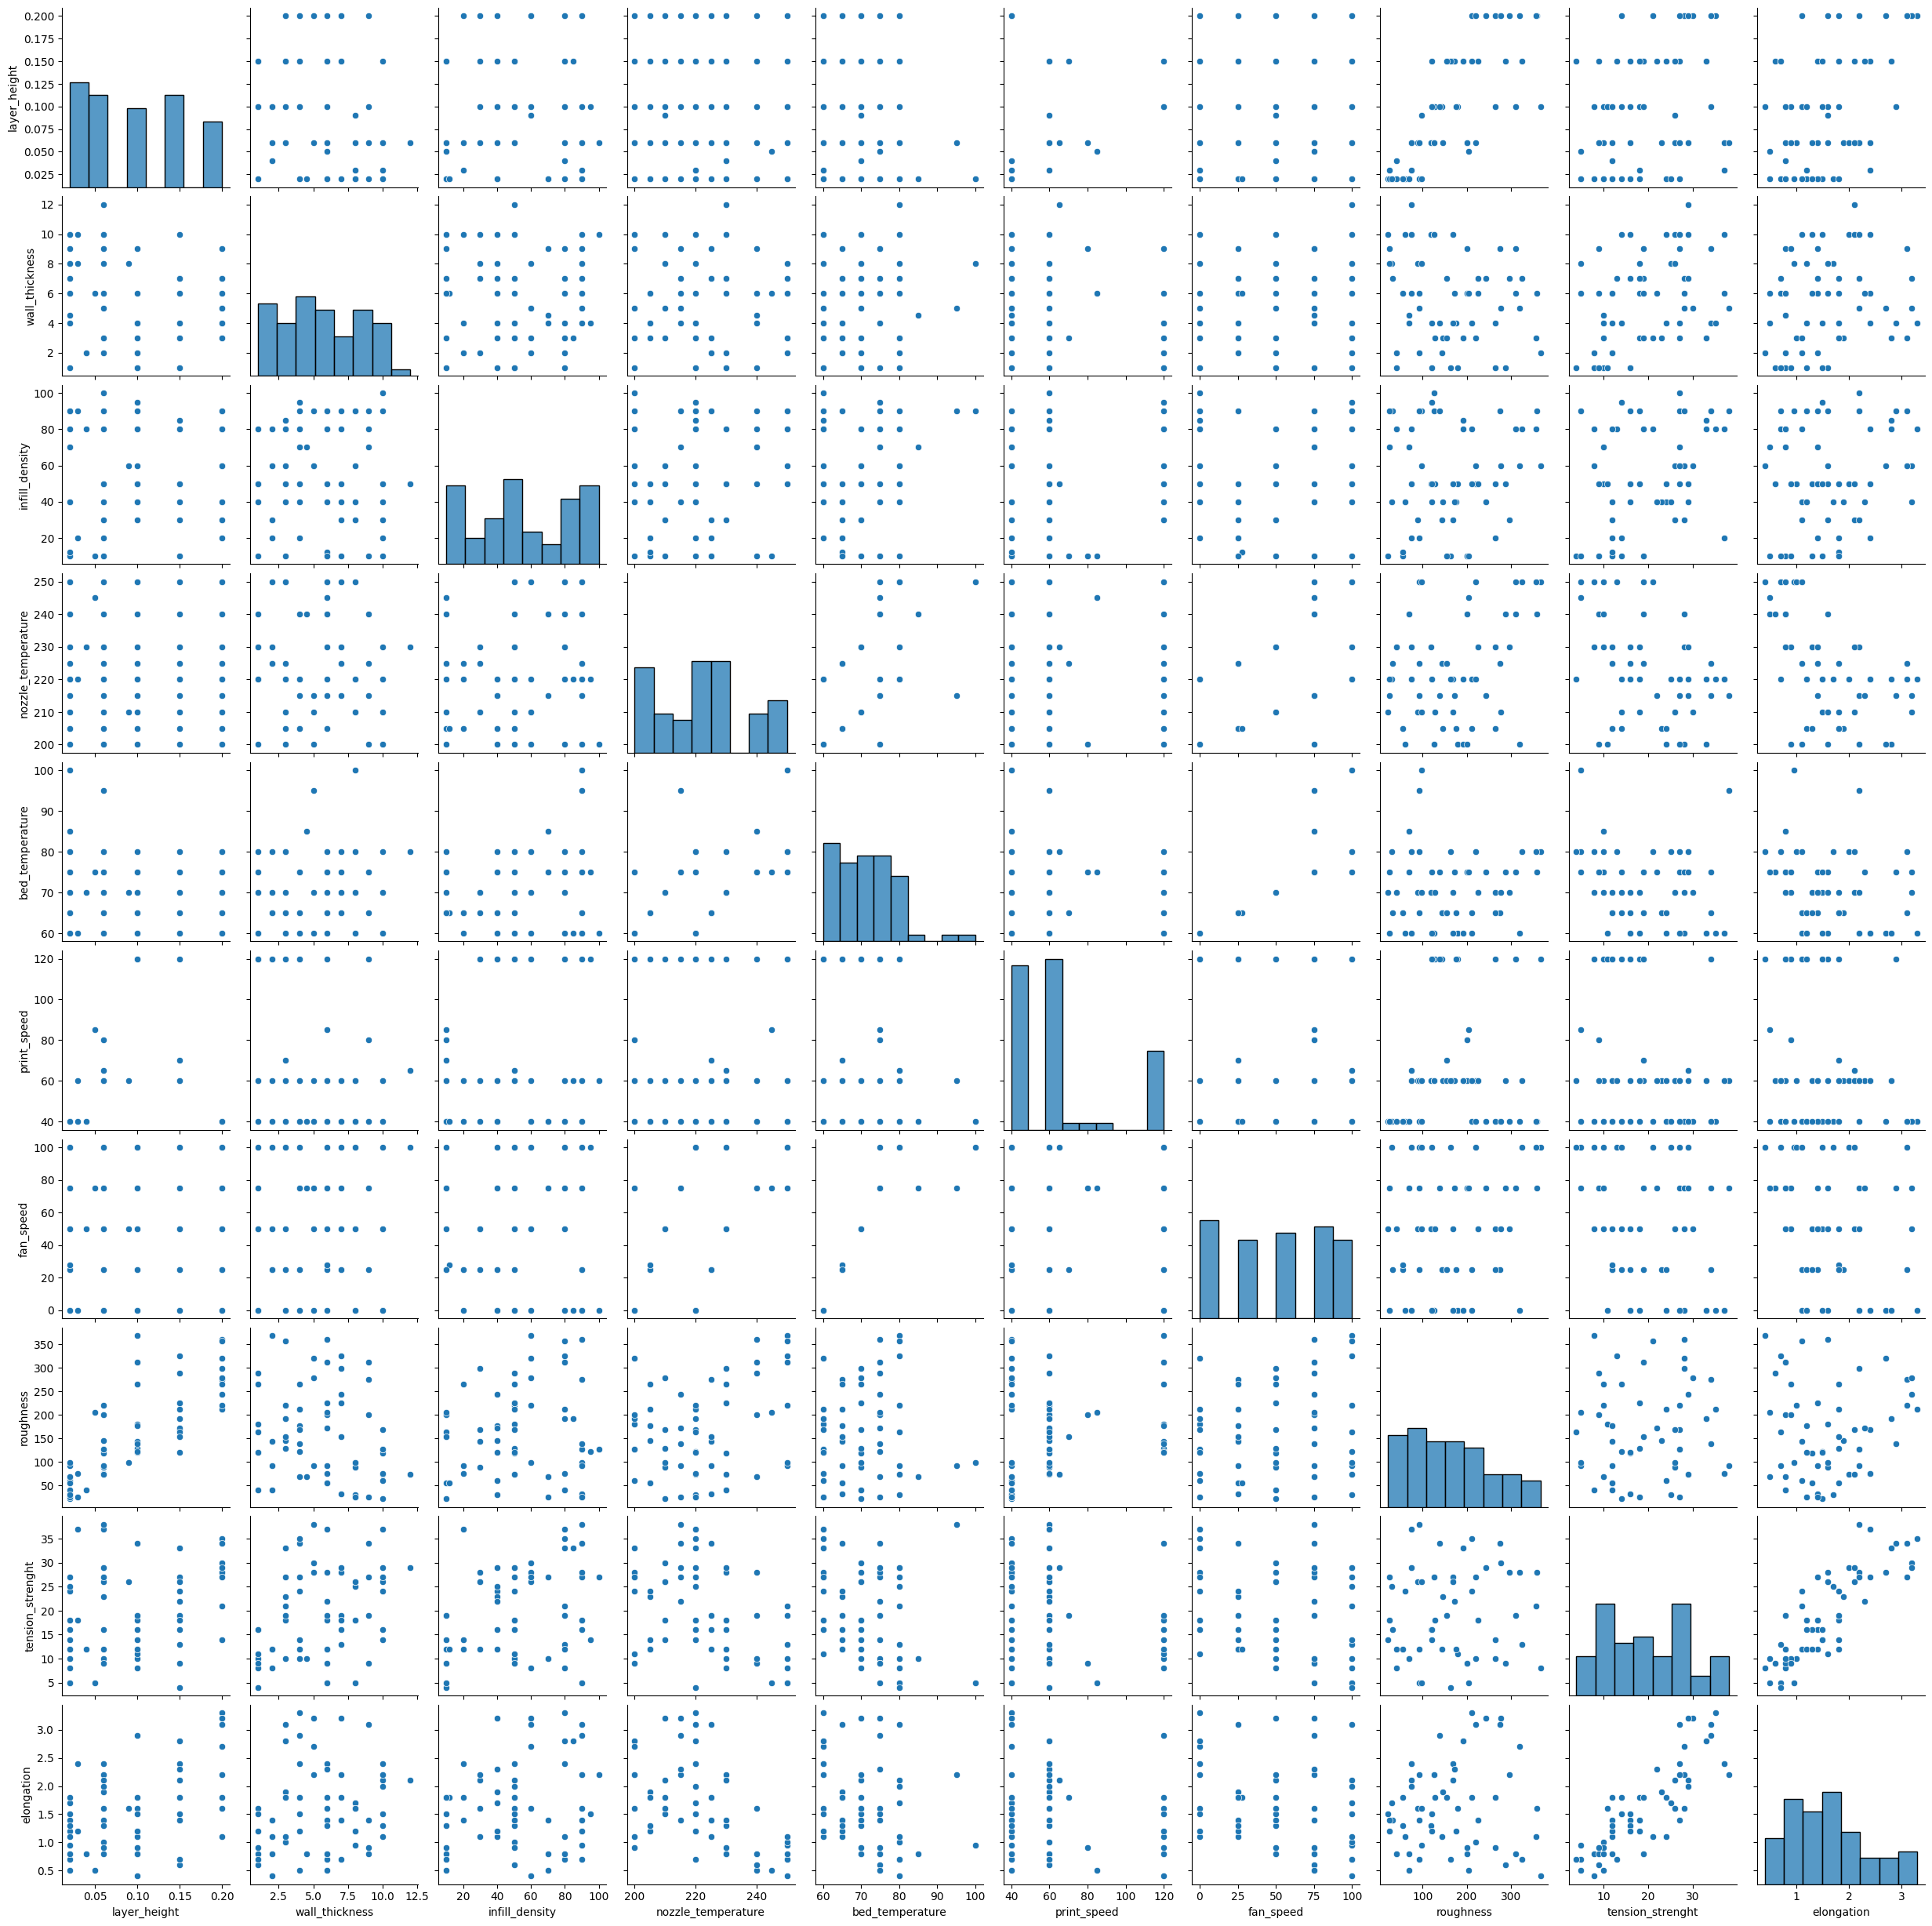

In [45]:
sns.pairplot(ds)

<Axes: >

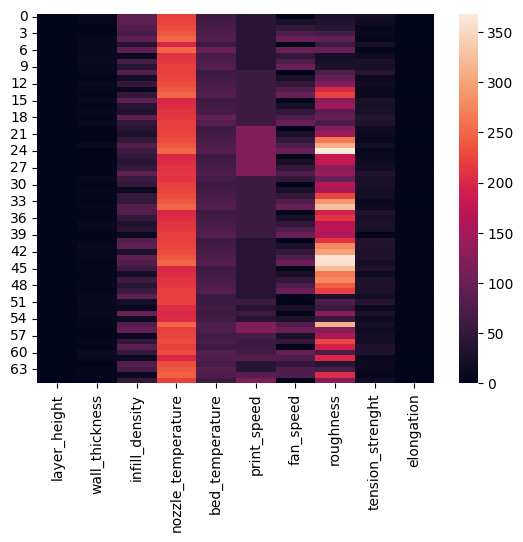

In [46]:
sns.heatmap(ds[['layer_height','wall_thickness','infill_density','nozzle_temperature','bed_temperature','print_speed','fan_speed','roughness','tension_strenght','elongation']])

In [47]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
ds=ds.iloc[:,:].values

In [48]:
ds[:,3]=lb.fit_transform(ds[:,3])
ds[:,7]=lb.fit_transform(ds[:,7])

In [49]:
da=pd.DataFrame(ds)

In [50]:

y=ds[:,7]
y=y.astype("int")

In [51]:
da.drop(columns=7,inplace=True)

In [52]:
x=da.iloc[:,:].values

In [53]:
x

array([[0.02, 8.0, 90, 0, 220, 60, 40, 0, 25, 18, 1.2],
       [0.02, 7.0, 90, 1, 225, 65, 40, 25, 32, 16, 1.4],
       [0.02, 1.0, 80, 0, 230, 70, 40, 50, 40, 8, 0.8],
       [0.02, 4.0, 70, 1, 240, 75, 40, 75, 68, 10, 0.5],
       [0.02, 6.0, 90, 0, 250, 80, 40, 100, 92, 5, 0.7],
       [0.02, 10.0, 40, 1, 200, 60, 40, 0, 60, 24, 1.1],
       [0.02, 8.0, 90, 0, 250, 100, 40, 100, 98, 5, 0.95],
       [0.02, 10.0, 10, 1, 210, 70, 40, 50, 21, 14, 1.5],
       [0.02, 9.0, 70, 0, 215, 75, 40, 75, 24, 27, 1.4],
       [0.02, 8.0, 40, 1, 220, 80, 40, 100, 30, 25, 1.7],
       [0.06, 6.0, 80, 0, 220, 60, 60, 0, 75, 37, 2.4],
       [0.06, 2.0, 20, 1, 225, 65, 60, 25, 92, 12, 1.4],
       [0.06, 10.0, 50, 0, 230, 70, 60, 50, 118, 16, 1.3],
       [0.06, 6.0, 10, 1, 240, 75, 60, 75, 200, 9, 0.8],
       [0.06, 3.0, 50, 0, 250, 80, 60, 100, 220, 10, 1.0],
       [0.06, 10.0, 90, 1, 200, 60, 60, 0, 126, 27, 2.2],
       [0.06, 3.0, 40, 0, 205, 65, 60, 25, 145, 23, 1.9],
       [0.06, 8.0, 30, 1

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [56]:
x_train

array([[0.15, 7.0, 80, 0, 250, 80, 60, 100, 326, 13, 0.7],
       [0.1, 1.0, 50, 1, 200, 60, 120, 0, 180, 11, 1.6],
       [0.02, 4.0, 70, 1, 240, 75, 40, 75, 68, 10, 0.5],
       [0.06, 8.0, 30, 1, 210, 70, 60, 50, 88, 26, 1.6],
       [0.2, 4.0, 80, 0, 220, 60, 40, 0, 212, 35, 3.3],
       [0.02, 9.0, 70, 0, 215, 75, 40, 75, 24, 27, 1.4],
       [0.02, 8.0, 90, 0, 250, 100, 40, 100, 98, 5, 0.95],
       [0.1, 4.0, 90, 0, 215, 75, 120, 75, 138, 34, 2.9],
       [0.02, 6.0, 90, 0, 250, 80, 40, 100, 92, 5, 0.7],
       [0.2, 7.0, 40, 0, 215, 75, 40, 75, 244, 29, 3.2],
       [0.15, 4.0, 50, 0, 205, 65, 60, 25, 212, 24, 1.8],
       [0.06, 10.0, 50, 1, 220, 80, 60, 100, 74, 29, 2.0],
       [0.1, 4.0, 95, 0, 220, 75, 120, 100, 121, 14, 1.5],
       [0.15, 3.0, 85, 1, 220, 60, 60, 0, 192, 33, 2.8],
       [0.15, 7.0, 50, 0, 230, 70, 60, 50, 225, 18, 1.4],
       [0.03, 8.0, 90, 0, 220, 60, 40, 0, 25, 18, 1.2],
       [0.15, 7.0, 10, 1, 225, 65, 60, 25, 154, 19, 1.8],
       [0.2, 3.0, 80,

In [57]:
x_train=sc.fit_transform(x_train)

In [58]:
x_train

array([[0.72222222, 0.54545455, 0.77777778, 0.        , 1.        ,
        0.5       , 0.25      , 1.        , 0.87896254, 0.26470588,
        0.10344828],
       [0.44444444, 0.        , 0.44444444, 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.45821326, 0.20588235,
        0.4137931 ],
       [0.        , 0.27272727, 0.66666667, 1.        , 0.8       ,
        0.375     , 0.        , 0.75      , 0.13544669, 0.17647059,
        0.03448276],
       [0.22222222, 0.63636364, 0.22222222, 1.        , 0.2       ,
        0.25      , 0.25      , 0.5       , 0.19308357, 0.64705882,
        0.4137931 ],
       [1.        , 0.27272727, 0.77777778, 0.        , 0.4       ,
        0.        , 0.        , 0.        , 0.55043228, 0.91176471,
        1.        ],
       [0.        , 0.72727273, 0.66666667, 0.        , 0.3       ,
        0.375     , 0.        , 0.75      , 0.00864553, 0.67647059,
        0.34482759],
       [0.        , 0.63636364, 0.88888889, 0.        , 1.

In [59]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
x_train=sc.fit_transform(x_train)

In [60]:
x_test=sc.transform(x_test)

In [61]:
x_test

array([[0.        , 0.45454545, 0.02222222, 0.        , 0.1       ,
        0.125     , 0.        , 0.28      , 0.09798271, 0.23529412,
        0.48275862],
       [0.11111111, 0.09090909, 0.77777778, 0.        , 0.6       ,
        0.25      , 0.        , 0.5       , 0.05475504, 0.23529412,
        0.13793103],
       [0.        , 0.63636364, 0.88888889, 0.        , 0.4       ,
        0.        , 0.        , 0.        , 0.01152738, 0.41176471,
        0.27586207],
       [1.        , 0.36363636, 0.55555556, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.86455331, 0.70588235,
        0.79310345],
       [0.        , 0.81818182, 0.33333333, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.11239193, 0.58823529,
        0.24137931],
       [0.        , 0.31818182, 0.66666667, 1.        , 0.8       ,
        0.625     , 0.        , 0.75      , 0.13544669, 0.17647059,
        0.13793103],
       [0.22222222, 0.18181818, 0.33333333, 0.        , 0.

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

1.0

In [65]:
import sklearn.metrics as metrics
fpr,tpr,thresold=metrics.roc_curve(y_test,y_pred_dt)
roc_auc_DT=metrics.auc(fpr,tpr)
roc_auc_DT

np.float64(1.0)

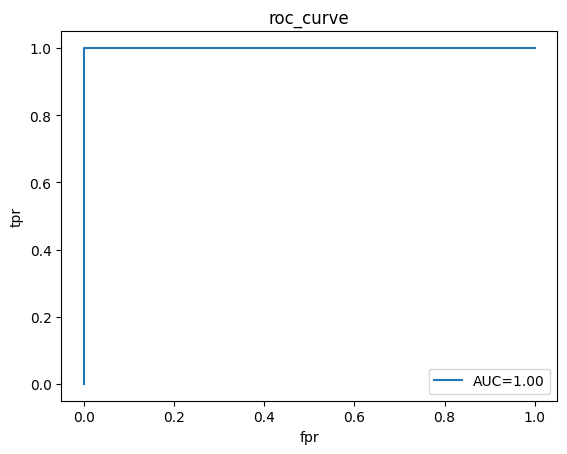

In [66]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc_DT)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc_curve")
plt.legend()

In [67]:
x_pred=[[0.72222222, 0.        , 0.44444444, 0.        , 0.4       ,
        0.        , 1.        , 0.        , 0.28530259, 0.35294118,
        0.39285714]]

In [68]:
import pickle
pickle.dump(dt,open('model.pkl','wb'))

In [69]:

model = pickle.load(open('model.pkl', 'rb'))



In [70]:
model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])